In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [161]:
# Load data
talents = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
talents

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN


# Prepare data for finding similarity metrics

In [163]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Vectorizing Columns for similarities

looks at text similarity <br>
1 - Bin connections <br>
2 - Sentence transformer, it will create a model <br>
3 - Fuzzy similarity. fuzzywuzzy. <br>
4-  Function that returns the similarity score <br>
5 - Two complexities: Text Embedding, converting & 

Snippet

from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

from fuzzywuzzy import fuzz
def sentence_similarity(title, target_title, model):
        sentences = [title, target_title]

        

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]
        
https://www.sbert.net/


In [166]:
# Merge all columns in one of the dataframe
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location + " " + talents.connection
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C.T. Bauer College of Business Graduate (...
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,Native English Teacher at EPIK (English Progra...
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional Raleigh-...
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,"People Development Coordinator at Ryan Denton,..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,Advisory Board Member at Celal Bayar Universit...


In [167]:
# Will set up both count vectorizer and tfidf to compare afterwards metrics on both approaches
tfidf_vect = TfidfVectorizer(stop_words={'en'})
talents_tfidf_vect = tfidf_vect.fit_transform(talents.text_for_vectorizing)


In [168]:
#Save it in a dataframe
talents_tfidf_df= pd.DataFrame(talents_tfidf_vect.todense(),columns=tfidf_vect.get_feature_names())
talents_tfidf_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.287908,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.353651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.262021,0.0,0.0,0.0,0.0,0.0,0.000000,0.262021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
101,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269716,0.000000
102,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [160]:
#With Countvectorizer
count_vect = CountVectorizer(stop_words={'en'})
talents_count_vect = count_vect.fit_transform(talents.text_for_vectorizing)
talents_count_df= pd.DataFrame(talents_count_vect.todense(),columns=count_vect.get_feature_names())
talents_count_df

,103,155,16,174,18,19,2019,2020,212,2621,...,western,westfield,with,within,woodlands,work,world,worth,york,zmir
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing data


In [169]:
# Bin connections
talents.connection.replace('500+ ','500',inplace=True)
talents.astype({'connection': 'int32'})
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C.T. Bauer College of Business Graduate (...
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN,Native English Teacher at EPIK (English Progra...
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional Raleigh-...
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN,"People Development Coordinator at Ryan Denton,..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN,Advisory Board Member at Celal Bayar Universit...


In [170]:
talents.connection.unique()


array(['85', '500', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [171]:
bins = [0, 50, 100, 200, 300, 400, 500]
labels = [1,2,3,4,5,6]
talents['binned_connections'] = pd.cut(talents['connection'].astype(int), bins=bins, labels=labels)
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,2019 C.T. Bauer College of Business Graduate (...,2
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN,Native English Teacher at EPIK (English Progra...,6
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,Aspiring Human Resources Professional Raleigh-...,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN,"People Development Coordinator at Ryan Denton,...",6
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN,Advisory Board Member at Celal Bayar Universit...,6


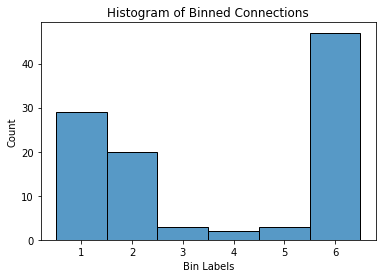

In [172]:
# Histogram of bins
sns.histplot(talents['binned_connections'])
plt.xlabel('Bin Labels')
plt.ylabel('Count')
plt.title('Histogram of Binned Connections')
plt.show()

In [173]:
# Using sentence transformers
from sentence_transformers import SentenceTransformer, util

sent_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [174]:
# Declare key words
key_words_1 = 'Aspiring human resources'
key_words_2 = 'seeking human resources'

In [175]:
# Transforming key words
key_transformed_1 = sent_model.encode(key_words_1, convert_to_tensor=True)
key_transformed_2 = sent_model.encode(key_words_2, convert_to_tensor=True)

In [178]:
# Remove punctuation
talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
talents['location']=talents.location.str.replace('[^\w\s]','')
talents.head()

<ipython-input-178-24cb35c2c4cc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['job_title']=talents.job_title.str.replace('[^\w\s]','')
<ipython-input-178-24cb35c2c4cc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  talents['location']=talents.location.str.replace('[^\w\s]','')


,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections
0,1,2019 ct bauer college of business graduate mag...,houston texas,85,NaN,2019 C.T. Bauer College of Business Graduate (...,2
1,2,native english teacher at epik english program...,kanada,500,NaN,Native English Teacher at EPIK (English Progra...,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,Aspiring Human Resources Professional Raleigh-...,1
3,4,people development coordinator at ryan,denton texas,500,NaN,"People Development Coordinator at Ryan Denton,...",6
4,5,advisory board member at celal bayar university,izmir türkiye,500,NaN,Advisory Board Member at Celal Bayar Universit...,6


In [179]:
# Lower case all words
talents['job_title']=talents.job_title.str.lower()
talents['location']=talents.location.str.lower()
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections
0,1,2019 ct bauer college of business graduate mag...,houston texas,85,NaN,2019 C.T. Bauer College of Business Graduate (...,2
1,2,native english teacher at epik english program...,kanada,500,NaN,Native English Teacher at EPIK (English Progra...,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,Aspiring Human Resources Professional Raleigh-...,1
3,4,people development coordinator at ryan,denton texas,500,NaN,"People Development Coordinator at Ryan Denton,...",6
4,5,advisory board member at celal bayar university,izmir türkiye,500,NaN,Advisory Board Member at Celal Bayar Universit...,6


In [180]:
# Removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

def remove_sw(row):
    stop_words = set(stopwords.words('english'))
  
    word_tokens = word_tokenize(row)
  
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words])

talents['job_title'] =talents.job_title.apply(remove_sw)
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 C.T. Bauer College of Business Graduate (...,2
1,2,native english teacher epik english program korea,kanada,500,NaN,Native English Teacher at EPIK (English Progra...,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,Aspiring Human Resources Professional Raleigh-...,1
3,4,people development coordinator ryan,denton texas,500,NaN,"People Development Coordinator at Ryan Denton,...",6
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,Advisory Board Member at Celal Bayar Universit...,6


In [181]:
talents['text_for_vectorizing'] = talents.job_title+ " " +talents.location 
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6


# Similarity metrics

## Using Fuzzy Library

In [182]:
from fuzzywuzzy import fuzz, process

In [183]:
# Test similar row to check score
round(fuzz.token_sort_ratio(key_words_1,talents.job_title.iloc[2])/100,3)

0.79

In [184]:
# Create function for fuzzy similarity
def sentence_fuzzy_similarity(title, target_title):
        return round(fuzz.token_sort_ratio(title,target_title)/100,3)

In [185]:
talents['fuzzy_key_1'] = round(talents.text_for_vectorizing.apply(sentence_fuzzy_similarity, args=(key_words_1,)),3)
talents['fuzzy_key_2'] = round(talents.text_for_vectorizing.apply(sentence_fuzzy_similarity, args=(key_words_2,)),3)
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32


## Using Cosine Similarity

In [186]:
def sentence_cos_similarity(title, target_title, model):
        sentences = [title, target_title]

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2)
        
        return similarity_score.numpy()[0][0]

In [187]:
sentence_cos_similarity(key_words_1,talents.job_title.iloc[0],sent_model)

0.56675386

In [188]:
# Applying to both key words
talents['cosine_key_1'] = round(talents.text_for_vectorizing.apply(sentence_cos_similarity, args=(key_words_1,sent_model)),3)
talents['cosine_key_2'] = round(talents.text_for_vectorizing.apply(sentence_cos_similarity, args=(key_words_2,sent_model)),3)
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26,0.527,0.417
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28,0.148,0.142
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32,0.797,0.725
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28,0.392,0.384
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32,0.244,0.222


## Using Euclidian similarity

In [189]:
from sklearn.metrics.pairwise import euclidean_distances

In [190]:
def sentence_eucl_distance(title, target_title, model):
        sentences = [title, target_title]

        #Compute embedding for both lists
        embedding_1= model.encode(sentences[0], convert_to_tensor=True)
        embedding_2 = model.encode(sentences[1], convert_to_tensor=True)
        
        return round(euclidean_distances(embedding_1.reshape(1,-1),embedding_2.reshape(1,-1))[0][0],3)

In [191]:
a = sent_model.encode(key_words_1,convert_to_tensor=True).reshape(1,-1)

In [192]:
b= sent_model.encode(talents.text_for_vectorizing.iloc[0],convert_to_tensor=True).reshape(1,-1)

In [193]:
euclidean_distances(a,b)

array([[0.97309756]], dtype=float32)

In [196]:
# Finding euclidian distances
talents['eucl_distance_key_1']=talents.text_for_vectorizing.apply(sentence_eucl_distance,args=(key_words_1,sent_model))
talents['eucl_distance_key_2']=talents.text_for_vectorizing.apply(sentence_eucl_distance,args=(key_words_2,sent_model))
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26,0.527,0.417,0.973,1.080
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28,0.148,0.142,1.305,1.310
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32,0.797,0.725,0.637,0.742
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28,0.392,0.384,1.103,1.110
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32,0.244,0.222,1.230,1.247


In [208]:
# Convert distance into Probability
def eucl_to_prob_1(distance,df):

    return (1/(distance**2))/(np.sum((1/df.eucl_distance_key_1)**2))
def eucl_to_prob_2(distance,df):

    return (1/(distance**2))/(np.sum((1/df.eucl_distance_key_2)**2))

In [209]:
talents['eucl_prob_key_1']=talents.eucl_distance_key_1.apply(eucl_to_prob,args=(talents,))
talents['eucl_prob_key_2']=talents.eucl_distance_key_2.apply(eucl_to_prob,args=(talents,))
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26,0.527,0.417,0.973,1.080,0.009920,0.008052
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28,0.148,0.142,1.305,1.310,0.005514,0.005472
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32,0.797,0.725,0.637,0.742,0.023145,0.017058
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28,0.392,0.384,1.103,1.110,0.007719,0.007622
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32,0.244,0.222,1.230,1.247,0.006207,0.006039


## Using Jaccard similarity

In [223]:
!pip install textdistance

You should consider upgrading via the '/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [224]:
from sklearn.metrics import jaccard_score
import textdistance

In [236]:
def sentence_jaccard_similiarity(title, target_title):
        
        
        return round(textdistance.jaccard.normalized_similarity(title,target_title),3)

In [238]:
# Input into dataframe
talents['jaccard_simil_key_1'] = talents.text_for_vectorizing.apply(sentence_jaccard_similiarity,args=(key_words_1,))
talents['jaccard_simil_key_2'] = talents.text_for_vectorizing.apply(sentence_jaccard_similiarity,args=(key_words_2,))
talents.head()

,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26,0.527,0.417,0.973,1.080,0.009920,0.008052,0.213,0.204
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28,0.148,0.142,1.305,1.310,0.005514,0.005472,0.333,0.339
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32,0.797,0.725,0.637,0.742,0.023145,0.017058,0.319,0.306
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28,0.392,0.384,1.103,1.110,0.007719,0.007622,0.286,0.291
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32,0.244,0.222,1.230,1.247,0.006207,0.006039,0.262,0.286


## Using Levensthein similarity

In [261]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

In [263]:
leven = NormalizedLevenshtein()
leven.similarity(key_words_1,talents.text_for_vectorizing.iloc[2])

0.323943661971831

In [266]:
def leven_similarity(title,target_title):
    leven = NormalizedLevenshtein()
    return round(leven.similarity(title,target_title),3)

In [268]:
talents['leven_key_1']=talents.text_for_vectorizing.apply(leven_similarity,args=(key_words_1,))
talents['leven_key_2']=talents.text_for_vectorizing.apply(leven_similarity,args=(key_words_2,))
talents.head()


,id,job_title,location,connection,fit,text_for_vectorizing,binned_connections,fuzzy_key_1,fuzzy_key_2,cosine_key_1,cosine_key_2,eucl_distance_key_1,eucl_distance_key_2,eucl_prob_key_1,eucl_prob_key_2,jaccard_simil_key_1,jaccard_simil_key_2,leven_key_1,leven_key_2
0,1,2019 ct bauer college business graduate magna ...,houston texas,85,NaN,2019 ct bauer college business graduate magna ...,2,0.37,0.26,0.527,0.417,0.973,1.080,0.009920,0.008052,0.213,0.204,0.215,0.206
1,2,native english teacher epik english program korea,kanada,500,NaN,native english teacher epik english program ko...,6,0.32,0.28,0.148,0.142,1.305,1.310,0.005514,0.005472,0.333,0.339,0.196,0.196
2,3,aspiring human resources professional,raleighdurham north carolina area,44,NaN,aspiring human resources professional raleighd...,1,0.51,0.32,0.797,0.725,0.637,0.742,0.023145,0.017058,0.319,0.306,0.324,0.282
3,4,people development coordinator ryan,denton texas,500,NaN,people development coordinator ryan denton texas,6,0.33,0.28,0.392,0.384,1.103,1.110,0.007719,0.007622,0.286,0.291,0.229,0.229
4,5,advisory board member celal bayar university,izmir türkiye,500,NaN,advisory board member celal bayar university i...,6,0.30,0.32,0.244,0.222,1.230,1.247,0.006207,0.006039,0.262,0.286,0.172,0.155


# Combine similarities for both key words and get an average